## Visulalize Effect of Matched Filtering for SA Detection

In [2]:
# import relevant libraries
import numpy as np 
from matplotlib import pyplot as plt
from scipy.signal import find_peaks, fftconvolve

import seaborn as sns 
sns.set_theme()

from src.data.utils import read_ns5_file 

**Read data**

In [6]:
path_2d = "../../data/raw/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5"
path_3d = "../../data/raw/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5"

# read the ns5 file
times_2d, data_2d = read_ns5_file(path_2d)
times_3d, data_3d = read_ns5_file(path_3d)

# extract single channel
channel = 1
data_2d = data_2d[:, channel]
data_3d = data_3d[:, channel]

**Identiy peak, make filter and convolve with signal**

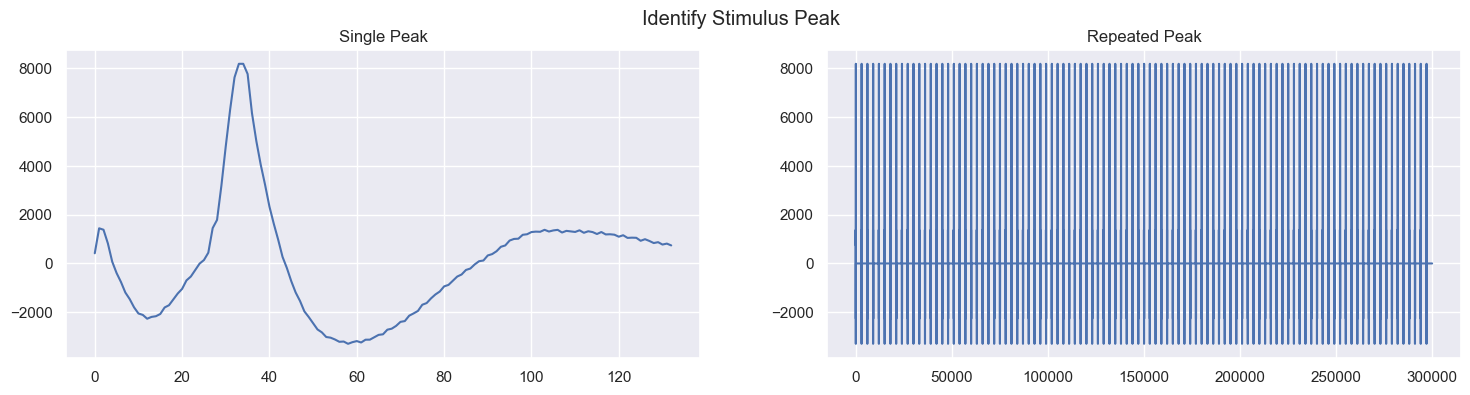

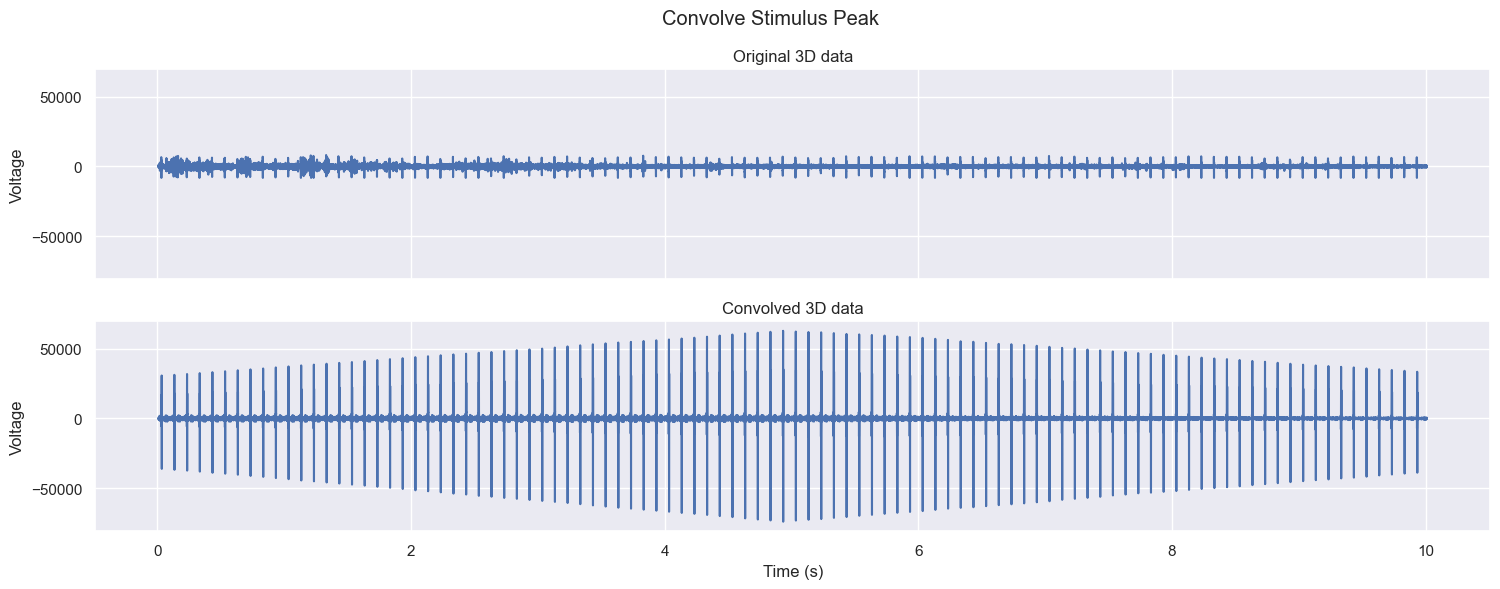

In [7]:
# find stimulus peak in 2D data 
stim_peak = np.argmax(data_2d)
peak = data_2d[stim_peak-33:stim_peak+100]

# mirror the peak
peak_mirror = np.r_[np.flip(peak), np.zeros(3000-33-100)]
peak_mirror = np.array([peak_mirror for _ in range(100)]).reshape(-1)

# convolve with 3D data
conv = fftconvolve(data_3d, peak_mirror / np.sum(peak_mirror), mode = "same")

# plot the data
fig, ax = plt.subplots(1, 2, figsize = (18, 4))
ax[0].plot(peak)
ax[1].plot(peak_mirror)
ax[0].set_title("Single Peak")
ax[1].set_title("Repeated Peak")
plt.suptitle("Identify Stimulus Peak")
plt.savefig("../../../notes/images_week2/stim_peak.pdf")
plt.show()

fig, ax = plt.subplots(2, 1, figsize = (18, 6), sharey = True, sharex = True)
ax[0].plot(times_3d[300:], data_3d[300:])
ax[0].set_title("Original 3D data")
ax[0].set_ylabel("Voltage")

ax[1].plot(times_3d[300:], conv[300:])
ax[1].set_xlabel("Time (s)")
ax[1].set_title("Convolved 3D data")
ax[1].set_ylabel("Voltage")


plt.suptitle("Convolve Stimulus Peak")
plt.show()

**Illustrate difference in found peaks**

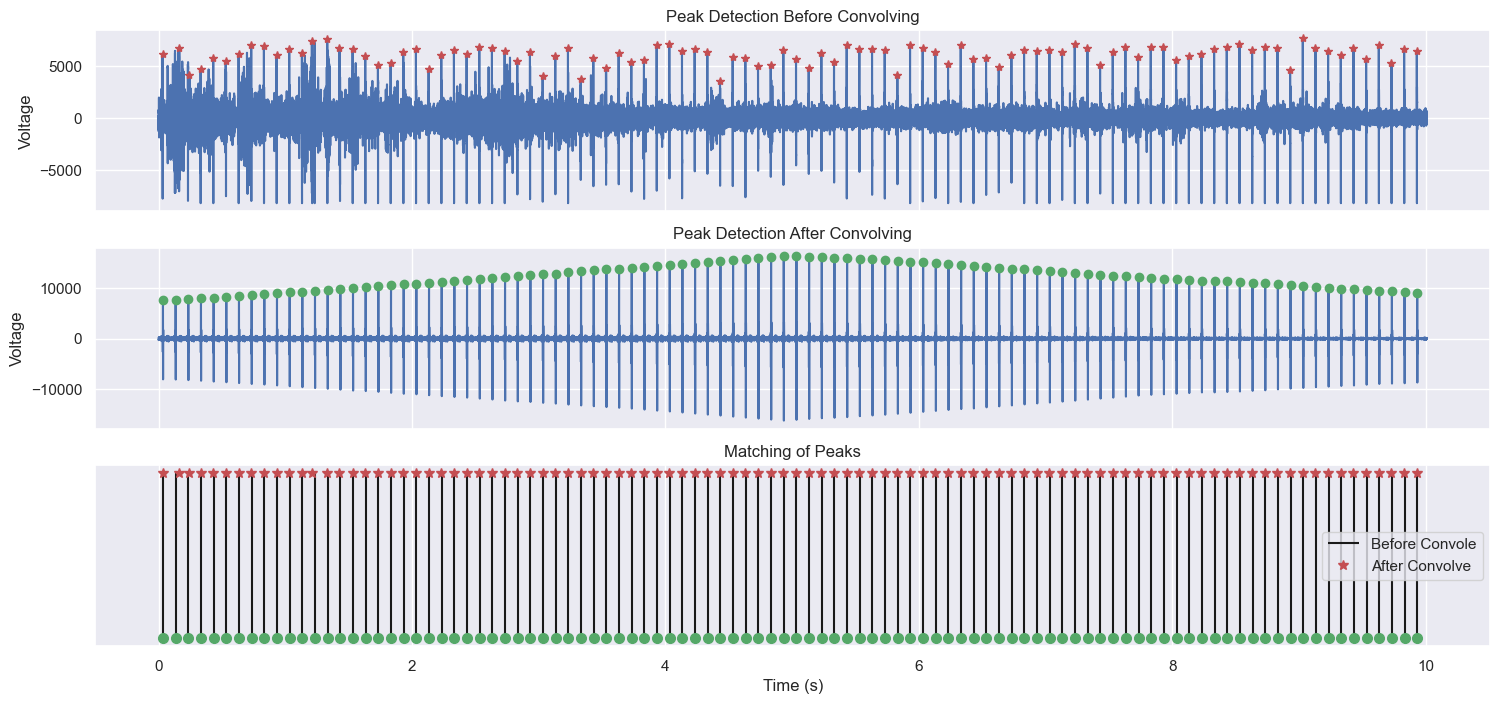

In [5]:
# find peaks before and after convultion
peaks, _ = find_peaks(conv, distance=2200, height = 200)
peaks_before, _ = find_peaks(data_3d, distance = 2200, height = 3000)

# plot the data
fig, ax = plt.subplots(3, 1, figsize = (18, 8), sharex = 1)
ax[0].plot(times_3d, data_3d)
ax[0].plot(times_3d[peaks_before], data_3d[peaks_before], 'r*')
ax[0].set_title("Peak Detection Before Convolving")
ax[0].set_ylabel("Voltage")

ax[1].plot(times_3d, conv)
ax[1].plot(times_3d[peaks], conv[peaks], 'go')
ax[1].set_title("Peak Detection After Convolving")
ax[1].set_ylabel("Voltage")

ax[2].vlines(peaks / 30000, 0, 1, color = "k")
ax[2].plot(peaks_before / 30000, np.ones(len(peaks_before)), 'r*', ms = 7)
ax[2].plot(peaks / 30000, np.zeros(len(peaks)), 'go', ms = 7)
ax[2].legend(["Before Convole", "After Convolve"])
ax[2].set_title("Matching of Peaks")
ax[2].set_xlabel("Time (s)")
ax[2].set_yticks([])

plt.savefig("../../../notes/images_week2/matched_filtering.pdf")
plt.show()